<h1>Linear Regression</h1> 
<h4>Melbourne Housing Market | Kaggle data를 사용하여 실습 </h4>

<h1>1.Import Libraries</h1>
<h4>- Python 라이브러리(1. pandas: 데이타 분석 라이브러리 패키지, 2. seaborn: 시각화 라이브러리)</h4>


In [40]:
import pandas as pd
import seaborn as sns

<h4>- scikit-learn 라이브러리(1. train_test_split: train / test 분리, 2. LinearRegression: 선형회귀), 3. metrics: 평가</h4>

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<h1>2.Import Datasets</h1>

In [42]:
df=pd.read_csv('C:\\Users\\WIN10\\Downloads\\archive\\Melbourne_housing_FULL.csv')
df.head()  #전체 데이터 프레임에서 상위 5개의 행을 출력

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


<h1>3. Remove Variables</h1>
<h4>non-numerical한 변수들 제거</h4>

In [43]:
del df['Address']
del df['Method']
del df['SellerG']
del df['Date']
del df['Postcode']
del df['YearBuilt']
del df['Type']
del df['Lattitude']
del df['Longtitude']
del df['Regionname']
del df['Suburb']
del df['CouncilArea']
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,4019.0


In [44]:
df.isnull().sum() #결측값 여부 확인 

Rooms                0
Price             7610
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Propertycount        3
dtype: int64

<h1>4. Remove or modify variables with missing values</h1>
<h4>유사도가 높은 것과 Missing Value가 많은 것을 제거</h4>

(34857, 9)

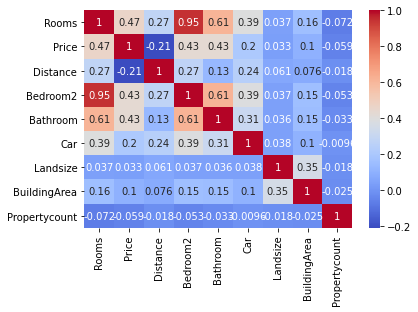

In [45]:
df_heat=df.corr() # 상관계수 계산
sns.heatmap(df_heat,annot=True, cmap='coolwarm') #데이터의 배열을 색상으로 표시해주는 Heatmap그리기
df.shape #dataframe의 row와 column수 파악

<h4>1) Rooms와 Bedroom2는 0.95로 유사도가 높으며, Bedroom2는 missing value 값이 8217로 많으므로 Bedroom2를 제거한다. </h4>
<h4>2) target value인 price와 연관성이 적은 LandSize(0.033), Propertycount(-0.059) 제거 </h4>
<h4>3) missing value 값이 21115로 많은 Building Area 제거 </h4>

In [46]:
del df['Bedroom2']
del df['Landsize']
del df['Propertycount']
del df['BuildingArea'] 
df.head()

,Rooms,Price,Distance,Bathroom,Car
0,2,NaN,2.5,1.0,1.0
1,2,1480000.0,2.5,1.0,1.0
2,2,1035000.0,2.5,1.0,0.0
3,3,NaN,2.5,2.0,1.0
4,3,1465000.0,2.5,2.0,0.0


In [47]:
df.isnull().sum()

Rooms          0
Price       7610
Distance       1
Bathroom    8226
Car         8728
dtype: int64

<h3>특정 변수의 missing value 값을 채우고 missing value가 있는 모든 row를 삭제 </h3>

In [48]:
df['Car'].fillna(df['Car'].mean(),inplace=True) #중간 값으로 채운다.
df.dropna(axis=0, how='any',thresh=None,subset=None,inplace=True) #missingvalue row모두 삭제
df.head()
df.shape

(20800, 5)

In [49]:
df.isnull().sum()

Rooms       0
Price       0
Distance    0
Bathroom    0
Car         0
dtype: int64

<h1>5. Set X and y variables</h1>

In [50]:
X = df[['Rooms','Distance','Bathroom','Car']] 
Y=df['Price']

<h1>6. Set algorithm</h1>

In [51]:
#model 훈련
model = LinearRegression()

<h1>7. Find y-intercept and X coefficients </h1>

In [52]:
import matplotlib.pyplot as plt
#28000개의 data중에서 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state =10, shuffle=True)
model.fit(X_train, y_train) #hyperplane 찾기 (4개 : X, 1개 : Y)
model.intercept_ #y price값과 intercept하는 값 찾기
model.coef_   #Coefficient 계산
model_results = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
model_results

,Coefficients
Rooms,269450.107900
Distance,-37787.766224
Bathroom,207173.059271
Car,47417.171595


<h1>8. Predict</h1>

In [53]:
new_house =[2,2.5,1,1]  #새로운 값으로 조건설정
new_house_predict = model.predict([new_house])
new_house_predict #house의 예측 값 : AUD(호주) $981746.347 

array([981746.34678378])

In [54]:
prediction=model.predict(X_test)
metrics.mean_absolute_error(y_test, prediction)
#예측 값은 $981746.347 이지만, 실제 집이 팔린 가격은 AUD $1480000로 오차가 크다.
#이유는 21개 중에서 16개 변수를 숫자가 아니라는 이유로 제거하였기 때문에 부정확하게 나왔다. 
#이부분은 one-hot encoding을 통해 해결할 수 있다.
#linear regression은 계산이 쉽고 빠르지만, 정확도가 떨어진다.

363782.9423236326